## Along with this file two other files has been submitted that is Recommenders.py and Evaluation.py

In [1]:
import pandas as pd
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

### Read and explore the dataset. (Rename column, plot histograms, find data characteristics)

In [2]:
cols = ['user_id', 'product_id', 'ratings', 'timestamp']

In [3]:
df = pd.read_csv('ratings_Electronics.csv',header = None)

In [4]:
df.columns = ['user_id', 'product_id', 'ratings', 'timestamp']

In [5]:
df.head()

,user_id,product_id,ratings,timestamp
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200
1,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
2,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
3,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
4,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200


In [6]:
df.shape

(7824482, 4)

In [7]:
#dropping the timestamp column
df = df.drop(['timestamp'],axis=1)

In [8]:
df.head()

,user_id,product_id,ratings
0,AKM1MP6P0OYPR,0132793040,5.0
1,A2CX7LUOHB2NDG,0321732944,5.0
2,A2NWSAGRHCP8N5,0439886341,1.0
3,A2WNBOD3WNDNKT,0439886341,3.0
4,A1GI0U4ZRJA8WN,0439886341,1.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002A20E6C6A90>]],
      dtype=object)

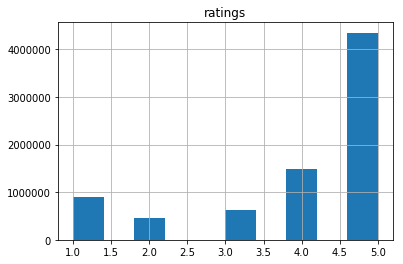

In [9]:
df.hist()

In [10]:
#forming the subset of the dataset with highest rating
df['ratings'].value_counts()

5.0    4347541
4.0    1485781
1.0     901765
3.0     633073
2.0     456322
Name: ratings, dtype: int64

In [11]:
#user statistics
df['user_id'].describe()

count           7824482
unique          4201696
top       A5JLAU2ARJ0BO
freq                520
Name: user_id, dtype: object

In [12]:
#product statistics
df['product_id'].describe()

count        7824482
unique        476002
top       B0074BW614
freq           18244
Name: product_id, dtype: object

In [13]:
#there are 4 million unique users but there are only 4 lakhs products.

In [14]:
#product popularity based on ratings
product_grouped = df.groupby(['product_id']).agg({'ratings': 'count'}).reset_index()
grouped_sum = product_grouped['ratings'].sum()
product_grouped['percentage']  = product_grouped['ratings'].div(grouped_sum)*100
product_grouped.sort_values(['ratings', 'product_id'], ascending = [0,1])

,product_id,ratings,percentage
308398,B0074BW614,18244,0.233166
429572,B00DR0PDNE,16454,0.210289
327308,B007WTAJTO,14172,0.181124
102804,B0019EHU8G,12285,0.157007
296625,B006GWO5WK,12226,0.156253
178601,B003ELYQGG,11617,0.148470
178813,B003ES5ZUU,10276,0.131331
323013,B007R5YDYA,9907,0.126615
289775,B00622AG6S,9823,0.125542
30276,B0002L5R78,9487,0.121248


In [15]:
#which user has bought how many products.
user_grouped = df.groupby(['user_id']).agg({'product_id': 'count'}).reset_index()
grouped_sum = user_grouped['product_id'].sum()
user_grouped['percentage']  = user_grouped['product_id'].div(grouped_sum)*100
user_grouped.sort_values(['user_id', 'product_id'], ascending = [0,1])

,user_id,product_id,percentage
4201695,AZZZY1W55XHZR,1,0.000013
4201694,AZZZWXXUPZ1F3,1,0.000013
4201693,AZZZSIK7NFFVP,1,0.000013
4201692,AZZZRS1YZ8HVP,2,0.000026
4201691,AZZZOVIBXHGDR,3,0.000038
4201690,AZZZMSZI9LKE6,1,0.000013
4201689,AZZZM2FO19RUO,1,0.000013
4201688,AZZZJXM9GW3C5,1,0.000013
4201687,AZZZEWADNFNUM,2,0.000026
4201686,AZZZDSAJ757Z4,1,0.000013


### Take subset of dataset to make it less sparse/more dense. (For example, keep the users only who has given 50 or more number of ratings )

In [16]:
df1 = df['user_id'].value_counts()

In [17]:
df2 = df1[df1>150].index.tolist()

In [18]:
df3 = df[df['user_id'].isin(df2)]

In [19]:
df3.shape

(21810, 3)

### collaberative filtering using Surprise package

In [20]:
from surprise import Dataset,Reader
reader = Reader(rating_scale=(1, 5))

In [21]:
data = Dataset.load_from_df(df3, reader)

In [22]:
data

In [23]:
# Split data to train and test
from surprise.model_selection import train_test_split
trainset, testset = train_test_split(data, test_size=.25,random_state=123)

In [24]:
type(trainset)

surprise.trainset.Trainset

In [25]:
user_records = trainset.ur
type(user_records)

collections.defaultdict

In [26]:
for keys in user_records.keys():
    print(keys)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97


In [27]:
user_records[0]

[(0, 4.0),
 (81, 4.0),
 (195, 3.0),
 (278, 4.0),
 (306, 4.0),
 (445, 4.0),
 (501, 5.0),
 (897, 4.0),
 (957, 4.0),
 (1071, 3.0),
 (1363, 4.0),
 (1480, 4.0),
 (1530, 4.0),
 (1592, 4.0),
 (1691, 4.0),
 (1789, 3.0),
 (2013, 2.0),
 (2060, 3.0),
 (237, 4.0),
 (2958, 4.0),
 (457, 4.0),
 (3249, 4.0),
 (3319, 4.0),
 (3538, 4.0),
 (1621, 4.0),
 (3713, 4.0),
 (3842, 4.0),
 (654, 4.0),
 (3986, 4.0),
 (4003, 4.0),
 (4036, 4.0),
 (4153, 4.0),
 (3483, 5.0),
 (4247, 2.0),
 (4371, 5.0),
 (4394, 4.0),
 (4533, 3.0),
 (4573, 3.0),
 (4600, 3.0),
 (4657, 4.0),
 (4798, 3.0),
 (4825, 4.0),
 (4858, 4.0),
 (4873, 4.0),
 (5009, 4.0),
 (5111, 5.0),
 (5149, 4.0),
 (5168, 3.0),
 (5235, 4.0),
 (5271, 4.0),
 (5332, 4.0),
 (5495, 4.0),
 (5507, 4.0),
 (5778, 4.0),
 (4658, 2.0),
 (5935, 5.0),
 (5974, 5.0),
 (2433, 3.0),
 (6209, 4.0),
 (5630, 5.0),
 (6251, 5.0),
 (6350, 4.0),
 (6412, 4.0),
 (6604, 4.0),
 (2124, 4.0),
 (2903, 4.0),
 (6763, 5.0),
 (6994, 3.0),
 (4521, 4.0),
 (7083, 4.0),
 (7111, 4.0),
 (425, 4.0),
 (7258, 

### KNN Model

In [28]:
from surprise import KNNWithMeans
from surprise import accuracy

In [29]:
algo = KNNWithMeans(k=50, sim_options={'name': 'pearson', 'user_based': False})
algo.fit(trainset)

Computing the pearson similarity matrix...
Done computing similarity matrix.


In [30]:
len(testset)

5453

In [31]:
testset[0:5]

[('A1ODOGXEYECQQ8', 'B008R7EWEI', 5.0),
 ('ARBKYIVNYWK3C', 'B000E120E4', 2.0),
 ('A1J75JJ0Q2OEJN', 'B006MBP7T0', 4.0),
 ('ABQWMANK4AR63', 'B00AR95ESC', 5.0),
 ('A250AXLRBVYKB4', 'B0008IV3XC', 5.0)]

In [32]:
# Evalute on test set
test_pred = algo.test(testset)

# compute RMSE
accuracy.rmse(test_pred)

RMSE: 1.0276


1.0276270492948614

In [33]:
test_pred[12]

Prediction(uid='AIJQU979J6UFY', iid='B00HR7FWUC', r_ui=4.0, est=4.314238552301767, details={'was_impossible': True, 'reason': 'User and/or item is unkown.'})

In [34]:
# convert results to dataframe
test_pred_df = pd.DataFrame(test_pred)
test_pred_df["was_impossible"] = [x["was_impossible"] for x in test_pred_df["details"]]
test_pred_df.loc[test_pred_df.was_impossible].head(5)

,uid,iid,r_ui,est,details,was_impossible
1,ARBKYIVNYWK3C,B000E120E4,2.0,4.314239,"{'was_impossible': True, 'reason': 'User and/o...",True
4,A250AXLRBVYKB4,B0008IV3XC,5.0,4.314239,"{'was_impossible': True, 'reason': 'User and/o...",True
5,A1RPTVW5VEOSI,B00793MIGK,4.0,4.314239,"{'was_impossible': True, 'reason': 'User and/o...",True
6,A5JLAU2ARJ0BO,B0000659UB,5.0,4.314239,"{'was_impossible': True, 'reason': 'User and/o...",True
7,A19W47CXJJP1MI,B00BIK06JG,5.0,4.314239,"{'was_impossible': True, 'reason': 'User and/o...",True


In [35]:
#generating top 10 recommendations

In [36]:
testset_new = trainset.build_anti_testset()
len(testset_new)
testset_new[0:5]
predictions = algo.test(testset_new[0:10000])
predictions_df = pd.DataFrame([[x.uid,x.est] for x in predictions])
predictions_df.columns = ["userId","est_rating"]
predictions_df.sort_values(by = ["userId", "est_rating"],ascending=False,inplace=True)
predictions_df.head()
top_10_recos = predictions_df.groupby("userId").head(10).reset_index(drop=True)

In [37]:
top_10_recos

,userId,est_rating
0,A3W4D8XOGLWUN5,5.0
1,A3W4D8XOGLWUN5,5.0
2,A3W4D8XOGLWUN5,5.0
3,A3W4D8XOGLWUN5,5.0
4,A3W4D8XOGLWUN5,5.0
5,A3W4D8XOGLWUN5,5.0
6,A3W4D8XOGLWUN5,5.0
7,A3W4D8XOGLWUN5,5.0
8,A3W4D8XOGLWUN5,5.0
9,A3W4D8XOGLWUN5,5.0


### SVD based approach

In [39]:
from surprise import Dataset,Reader
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(df3, reader)

In [40]:
# Split data to train and test
from surprise.model_selection import train_test_split
trainset, testset = train_test_split(data, test_size=.25,random_state=123)

In [41]:
from surprise import SVD
from surprise import accuracy

In [42]:
svd_model = SVD(n_factors=50,biased=False)
svd_model.fit(trainset)

In [43]:
test_pred = svd_model.test(testset)
accuracy.rmse(test_pred)

RMSE: 2.0790


2.0789737383505895

In [44]:
user_factors = svd_model.pu
user_factors.shape
item_factors = svd_model.qi
item_factors.shape

(10837, 50)

In [45]:
pred = np.dot(user_factors,np.transpose(item_factors))

In [48]:
pred[95,0:5]

array([-0.05328144,  0.28858021,  1.4766942 , -0.44389751,  0.00832313])

In [50]:
svd_model.predict(uid = trainset.to_raw_uid(95), iid = trainset.to_raw_iid(0))

Prediction(uid='A3NHUQ33CFH3VM', iid='B00KC7VY3S', r_ui=None, est=1, details={'was_impossible': False})

In [ ]:
#SVD parameter tuning

In [ ]:
from surprise.model_selection import GridSearchCV
param_grid = {'n_factors' : [5,10,15], "reg_all":[0.01,0.02]}
gs = GridSearchCV(SVD, param_grid, measures=['rmse'], cv=3,refit = True)

In [ ]:
gs.fit(data)

In [ ]:
gs.param_combinations

In [ ]:
gs.best_params

In [ ]:
gs.test(testset)

### popularity Recommender model

In [51]:
import time
from sklearn.externals import joblib
import Recommenders as Recommenders
import Evaluation as Evaluation

##### importing the class REcommenders and evalution which is submitted along with this file

In [52]:
df3.head()

,user_id,product_id,ratings
178,A17HMM1M7T9PJ1,0970407998,4.0
631,A3TAS1AG6FMBQW,0972683275,5.0
2162,A5JLAU2ARJ0BO,1400532655,1.0
3383,A3PD8JD9L4WEII,1400699169,5.0
4495,A1ZU55TM45Y2R8,8862936826,2.0


In [53]:
df3.shape

(21810, 3)

In [54]:
df3 = df3.drop_duplicates()

In [55]:
users = df3['user_id'].unique()
len(users)

98

In [56]:
items = df3['product_id'].unique()
len(items)

13405

In [57]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(df3, test_size = 0.20, random_state=0)

In [58]:
pr =  Recommenders.popularity_recommender_py()
pr.create(train_data, 'user_id', 'product_id')


In [59]:
pr.recommend(users[5])

,user_id,product_id,score,Rank
6124,A1VQHH85U7PX0,B003ES5ZUU,25,1.0
6903,A1VQHH85U7PX0,B004CLYEDC,23,2.0
8843,A1VQHH85U7PX0,B00829TIEK,21,3.0
6905,A1VQHH85U7PX0,B004CLYEFK,19,4.0
8847,A1VQHH85U7PX0,B0082E9K7U,19,5.0
8901,A1VQHH85U7PX0,B0088CJT4U,19,6.0
9916,A1VQHH85U7PX0,B00BOHNYTW,19,7.0
5516,A1VQHH85U7PX0,B002R5AM7C,18,8.0
6904,A1VQHH85U7PX0,B004CLYEE6,18,9.0
2675,A1VQHH85U7PX0,B000JMJWV2,17,10.0


### item similarity recommender class

In [101]:
#predictions(there are 165 unique users. so vaue can be 0-164)
user_id = users[97]
pr.recommend(user_id)

,user_id,product_id,score,Rank
6124,A34BZM6S9L7QI4,B003ES5ZUU,25,1.0
6903,A34BZM6S9L7QI4,B004CLYEDC,23,2.0
8843,A34BZM6S9L7QI4,B00829TIEK,21,3.0
6905,A34BZM6S9L7QI4,B004CLYEFK,19,4.0
8847,A34BZM6S9L7QI4,B0082E9K7U,19,5.0
8901,A34BZM6S9L7QI4,B0088CJT4U,19,6.0
9916,A34BZM6S9L7QI4,B00BOHNYTW,19,7.0
5516,A34BZM6S9L7QI4,B002R5AM7C,18,8.0
6904,A34BZM6S9L7QI4,B004CLYEE6,18,9.0
2675,A34BZM6S9L7QI4,B000JMJWV2,17,10.0


In [102]:
user_id = users[6]
pr.recommend(user_id)

,user_id,product_id,score,Rank
6124,A36K2N527TXXJN,B003ES5ZUU,25,1.0
6903,A36K2N527TXXJN,B004CLYEDC,23,2.0
8843,A36K2N527TXXJN,B00829TIEK,21,3.0
6905,A36K2N527TXXJN,B004CLYEFK,19,4.0
8847,A36K2N527TXXJN,B0082E9K7U,19,5.0
8901,A36K2N527TXXJN,B0088CJT4U,19,6.0
9916,A36K2N527TXXJN,B00BOHNYTW,19,7.0
5516,A36K2N527TXXJN,B002R5AM7C,18,8.0
6904,A36K2N527TXXJN,B004CLYEE6,18,9.0
2675,A36K2N527TXXJN,B000JMJWV2,17,10.0


### we can seee that recommendation is same for all the users in popularity model.

In [61]:
is_model = Recommenders.item_similarity_recommender_py()
is_model.create(train_data, 'user_id', 'product_id')

In [62]:
#personalized model to recommed some products
user_id = users[5]
user_items = is_model.get_user_items(user_id)
#
print("------------------------------------------------------------------------------------")
print("Training data products for the user userid: %s:" % user_id)
print("------------------------------------------------------------------------------------")

for user_item in user_items:
    print(user_item)

print("----------------------------------------------------------------------")
print("Recommendation process going on:")
print("----------------------------------------------------------------------")

#Recommend songs for the user using personalized model
is_model.recommend(user_id)

------------------------------------------------------------------------------------
Training data products for the user userid: A1VQHH85U7PX0:
------------------------------------------------------------------------------------
B0015EWMX8
B001B8EOMU
B001T0HFNA
B00008OE46
B001PY41YQ
B00CRJWW2G
B00009R6GE
B0035NXR8G
B00G76VT9W
B000HZI2YY
B000FOYMKU
B008X9Z7N0
B008X9Z9ZQ
B00188RK9M
B002SZEOLG
B0009JO2YC
B0011E4N5C
B006WHPQD6
B008X9Z8NE
B0038KY38Y
B00080SBD0
B0097CXWUW
B007STRVTY
B000VXHCQG
B005ZLOW8K
B00HMREOLK
B00009M6UM
B000FGGG34
B000BHQCP4
B00007E7JU
B008RW6RGE
B0011FQUQG
B0009XVGMO
B00008XETO
B000VX6XL6
B000OLDG60
B00B7XC6PQ
B0002V9IKK
B003CJTQJC
B00829TIEK
B007PJ4P4G
B0044WWLW0
B00181C9LS
B001TH7GSW
B00168YB78
B00HRQB28Y
B004DI7CWE
B001GKRM90
B005276QS6
B004VEJYEO
B000RB7C4E
B00FFZD51Q
B00IDYRZ0S
B004ALM80A
B004R739LE
B008ULPD0S
B00CRY250U
B00007EDM8
B00020E4QO
B004T9RR6I
B0002855KK
B0006LSINO
B00CXADBRY
B0039BPG1U
B00000K13I
B00004ZCJE
B004CLYEAK
B006M1MW1Q
B0041L3JS4
9043413585
B

,user_id,product_id,score,rank
0,A1VQHH85U7PX0,B008ULPE70,0.024662,1
1,A1VQHH85U7PX0,B009O7XO8U,0.023947,2
2,A1VQHH85U7PX0,B008X9Z528,0.023887,3
3,A1VQHH85U7PX0,B00F3F0EIU,0.023841,4
4,A1VQHH85U7PX0,B002R5AM7C,0.022939,5
5,A1VQHH85U7PX0,B004TPJKEY,0.022818,6
6,A1VQHH85U7PX0,B0079UAT0A,0.022563,7
7,A1VQHH85U7PX0,B004CLYEH8,0.022244,8
8,A1VQHH85U7PX0,B008HK3WK0,0.022017,9
9,A1VQHH85U7PX0,B0012GK3MQ,0.021549,10


In [63]:
#for different user

In [64]:
user_id = users[7]
#Fill in the code here
user_items = is_model.get_user_items(user_id)
#
print("------------------------------------------------------------------------------------")
print("Training data songs for the user userid: %s:" % user_id)
print("------------------------------------------------------------------------------------")

for user_item in user_items:
    print(user_item)

print("----------------------------------------------------------------------")
print("Recommendation process going on:")
print("----------------------------------------------------------------------")

#Recommend songs for the user using personalized model
is_model.recommend(user_id)

------------------------------------------------------------------------------------
Training data songs for the user userid: ADLVFFE4VBT8:
------------------------------------------------------------------------------------
B008MF465K
B008R7EVE4
B001T9NUJE
B00EMHVVNM
B002XGDU9M
B000M4XMGI
B00BGGDVOO
B000PKC102
B000FNBYKW
B00093IIRA
B003ES5ZSW
B002U0KGEI
B00165XQWW
B004P4HFX2
B0079TOEQQ
B0043WJRRS
B0079MX4Q4
B0023MYNCE
B000LQFI2I
B001DDUV20
B000067SGI
B001CK9760
B0014Z29U4
B00E362W9O
B003Y74AX4
B00DK2JQOQ
B004Z0KPUG
B005FDXZJU
B006G9VQV6
B00H7GU5QO
B000Y16TY6
B001E25JOA
B002SQK2F2
B001N0DQOS
B00GJMD08M
B001XUR5FO
B001TK3ACA
B009X3UW2G
B009WZRCO6
B0041BT21M
B00BB5ZQC0
B000FITJ04
B001Q3MA80
B00C8OT7FK
B00FSDKBYY
B001SGY2X6
B004CLYEDC
B001NEJO18
B001HA51Z6
B000FVGM38
B0019M9ESC
B000MF7R4K
B00IF0KJTE
B00CBD2X5E
B008X9Z528
B00GSEOV7U
B00FENIPQ4
B002WE4HE2
B0053R0WWG
B00EE18LRU
B009C98NPY
B000JVCPEY
B001P05NBA
B001RB1QWW
B001GXUCNU
B000HEANB0
B00006343P
B00123WZWK
B00005114Z
B003O8682Y
B003D

,user_id,product_id,score,rank
0,ADLVFFE4VBT8,B00CZDT30S,0.029695,1
1,ADLVFFE4VBT8,B00HFFDDLG,0.024535,2
2,ADLVFFE4VBT8,B0082E9K7U,0.024343,3
3,ADLVFFE4VBT8,B004CLYEE6,0.024312,4
4,ADLVFFE4VBT8,B00FSA8VQ2,0.023818,5
5,ADLVFFE4VBT8,B00BB72WX4,0.023655,6
6,ADLVFFE4VBT8,B005QCDY50,0.023482,7
7,ADLVFFE4VBT8,B00GMTN96U,0.023176,8
8,ADLVFFE4VBT8,B00ARB5FLQ,0.023031,9
9,ADLVFFE4VBT8,B00BB6LTI4,0.022936,10


### Evaluate both the models. (Once the model is trained on the training data, it can be used to compute the error (RMSE) on predictions made on the test data.)


In [65]:
pr

In [66]:
start = time.time()

#Define what percentage of users to use for precision recall calculation
user_sample = 0.05

#Instantiate the precision_recall_calculator class
pm = Evaluation.precision_recall_calculator(test_data, train_data, pr, is_model)

#Call method to calculate precision and recall values
(pm_avg_precision_list, pm_avg_recall_list, ism_avg_precision_list, ism_avg_recall_list) = pm.calculate_measures(user_sample)

end = time.time()
print(end - start)

Length of user_test_and_training:98
Length of user sample:4
Getting recommendations for user:A3OXHLG6DIBRW8
No. of unique products for the user: 395
no. of unique products in the training set: 11347
Non zero values in cooccurence_matrix :263742
user_sim_items Index(['user_id', 'product_id', 'score', 'rank'], dtype='object')
Getting recommendations for user:A11I1I9QLMAM1A
No. of unique products for the user: 165
no. of unique products in the training set: 11347
Non zero values in cooccurence_matrix :94959
user_sim_items Index(['user_id', 'product_id', 'score', 'rank'], dtype='object')
Getting recommendations for user:A2UOHALGF2X77Q
No. of unique products for the user: 183
no. of unique products in the training set: 11347
Non zero values in cooccurence_matrix :93186
user_sim_items Index(['user_id', 'product_id', 'score', 'rank'], dtype='object')
Getting recommendations for user:ALDAF4VVLFRHP
No. of unique products for the user: 130
no. of unique products in the training set: 11347
Non ze

In [67]:
pm_avg_precision_list

[0.0,
 0.0,
 0.0,
 0.0625,
 0.05,
 0.041666666666666664,
 0.03571428571428571,
 0.0625,
 0.05555555555555555,
 0.05]

In [68]:
pm_avg_recall_list

[0.0,
 0.0,
 0.0,
 0.0024271844660194173,
 0.0024271844660194173,
 0.0024271844660194173,
 0.0024271844660194173,
 0.0081090026478376,
 0.0081090026478376,
 0.0081090026478376]

In [69]:
ism_avg_precision_list

[0.0,
 0.0024271844660194173,
 0.0024271844660194173,
 0.0024271844660194173,
 0.0024271844660194173,
 0.0024271844660194173,
 0.0024271844660194173,
 0.0081090026478376,
 0.0081090026478376,
 0.0081090026478376]

In [70]:
ism_avg_recall_list

[0.0,
 0.125,
 0.08333333333333333,
 0.0625,
 0.05,
 0.041666666666666664,
 0.03571428571428571,
 0.0625,
 0.05555555555555555,
 0.05]

In [71]:
import pylab as pl

#Method to generate precision and recall curve
def plot_precision_recall(m1_precision_list, m1_recall_list, m1_label, m2_precision_list, m2_recall_list, m2_label):
    pl.clf()    
    pl.plot(m1_recall_list, m1_precision_list, label=m1_label)
    pl.plot(m2_recall_list, m2_precision_list, label=m2_label)
    pl.xlabel('Recall')
    pl.ylabel('Precision')
    pl.ylim([0.0, 0.2])
    pl.xlim([0.0, 0.2])
    pl.title('Precision-Recall curve')
    #pl.legend(loc="upper right")
    pl.legend(loc=9, bbox_to_anchor=(0.5, -0.2))
    pl.show()

Plotting precision recall curves.


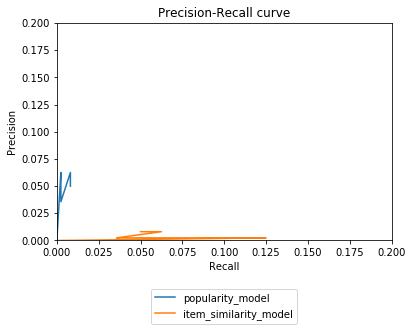

In [72]:
print("Plotting precision recall curves.")

plot_precision_recall(pm_avg_precision_list, pm_avg_recall_list, "popularity_model",
                      ism_avg_precision_list, ism_avg_recall_list, "item_similarity_model")

### comparing the models using recmetrics

In [73]:
#!pip install recmetrics

In [74]:
import recmetrics

In [75]:
test = test_pred_df.copy()
test.drop({"details","was_impossible"}, inplace=True, axis=1)
test.columns = ['user_id', 'product_id', 'actual', 'cf_predictions']
test.head()

,user_id,product_id,actual,cf_predictions
0,A1ODOGXEYECQQ8,B008R7EWEI,5.0,5.000000
1,ARBKYIVNYWK3C,B000E120E4,2.0,4.314239
2,A1J75JJ0Q2OEJN,B006MBP7T0,4.0,4.000000
3,ABQWMANK4AR63,B00AR95ESC,5.0,5.000000
4,A250AXLRBVYKB4,B0008IV3XC,5.0,4.314239


In [76]:
print("MSE -", recmetrics.mse(test.actual, test.cf_predictions))
print("RMSE -", recmetrics.rmse(test.actual, test.cf_predictions))

MSE - 1.0560173524424636
RMSE - 1.0276270492948614


In [78]:
cf_model = test.pivot_table(index='user_id', columns='product_id', values='cf_predictions').fillna(0)
cf_model.head(10)

product_id,0972683275,9043413585,B00000DM9W,B00000J08C,B00000J08Q,B00000J1TX,B00000J1US,B00000JBIA,B00000JDGO,B00000JFJA,...,B00L1I80K2,B00L21HC7A,B00L2442H0,B00L26YDA4,B00L2P3TRS,B00L3YHF6O,B00L8I6SFY,B00LBZ1Z7K,B00LGQ6HL8,B00LI4ZZO8
user_id,,,,,,,,,,,,,,,,,,,,,
A11I1I9QLMAM1A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A11KZ906QD08C5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A12DQZKRKTNF5E,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A15QYHQH80W30L,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A17BUUBOU0598B,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A17HMM1M7T9PJ1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A18HE80910BTZI,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A19W47CXJJP1MI,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A1BT6TL7UCIC5Y,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [79]:
test_pred_df.iloc[162,0]

'ARBKYIVNYWK3C'

In [80]:
def get_users_predictions(userId, n, model):
    recommended_items = pd.DataFrame(model.loc[userId])
    recommended_items.columns = ["predicted_rating"]
    recommended_items = recommended_items.sort_values('predicted_rating', ascending=False)    
    recommended_items = recommended_items.head(n)
    return recommended_items.index.tolist()

In [81]:
# Get example prediction
get_users_predictions('A2XRMQA6PJ5ZJ8', 10, cf_model)

['B000BQ7GW8',
 'B001V9KG0I',
 'B00015GYU4',
 'B001764QQU',
 'B0009GZAGO',
 'B000ZMCILW',
 'B000BY52NK',
 'B00009MDBQ',
 'B000W4TZSC',
 'B000UE50O2']

In [83]:

test = test.copy().groupby('user_id')['product_id'].agg({'actual': (lambda x: list(set(x)))})
# make recommendations for all members in the test data
recs = []
for user in test.index:
    cf_predictions = get_users_predictions(user, 10, cf_model)
    recs.append(cf_predictions)
        
test['cf_predictions'] = recs
test.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  


,actual,cf_predictions
user_id,,
A11I1I9QLMAM1A,"[B002HWRJBM, B004C9P9TM, B001GX6MJ8, B009AMBEK...","[B004C9P9TM, B004CLYEE6, B00E055H5O, B00BM7Y7D..."
A11KZ906QD08C5,"[B000V2MK8M, B00894YP00, B001D06BZY, B000PTFDY...","[B000JV9LUK, B001SER47O, B004J3V7RO, B00IVFDZB..."
A12DQZKRKTNF5E,"[B007Q45EF4, B00CXFH878, B00HNJWVO4, B001UI2FP...","[B003VAGXWK, B0052SCU8U, B00HG1L334, B001O94GN..."
A15QYHQH80W30L,"[B004LTM93M, B00004TX71, B001HX44A6, B0012GQZZ...","[B000144I30, B0017JY5FE, B00009WQS1, B000VDCTC..."
A17BUUBOU0598B,"[B00BVQXGUI, B004YNE7V2, B004CJ8DKE, B000VXKBZ...","[B00BVQXGUI, B0039BPG1U, B001HMVAWC, B00023CJI..."


In [85]:
# make recommendations for all members in the test data based on popularity based approach
popularity_recs = df3.product_id.value_counts().head(10).index.tolist()

recs = []
for user in test.index:
    pop_predictions = popularity_recs
    recs.append(pop_predictions)
        
test['pop_predictions'] = recs
test.head()

,actual,cf_predictions,pop_predictions
user_id,,,
A11I1I9QLMAM1A,"[B002HWRJBM, B004C9P9TM, B001GX6MJ8, B009AMBEK...","[B004C9P9TM, B004CLYEE6, B00E055H5O, B00BM7Y7D...","[B003ES5ZUU, B0088CJT4U, B004CLYEDC, B004CLYEF..."
A11KZ906QD08C5,"[B000V2MK8M, B00894YP00, B001D06BZY, B000PTFDY...","[B000JV9LUK, B001SER47O, B004J3V7RO, B00IVFDZB...","[B003ES5ZUU, B0088CJT4U, B004CLYEDC, B004CLYEF..."
A12DQZKRKTNF5E,"[B007Q45EF4, B00CXFH878, B00HNJWVO4, B001UI2FP...","[B003VAGXWK, B0052SCU8U, B00HG1L334, B001O94GN...","[B003ES5ZUU, B0088CJT4U, B004CLYEDC, B004CLYEF..."
A15QYHQH80W30L,"[B004LTM93M, B00004TX71, B001HX44A6, B0012GQZZ...","[B000144I30, B0017JY5FE, B00009WQS1, B000VDCTC...","[B003ES5ZUU, B0088CJT4U, B004CLYEDC, B004CLYEF..."
A17BUUBOU0598B,"[B00BVQXGUI, B004YNE7V2, B004CJ8DKE, B000VXKBZ...","[B00BVQXGUI, B0039BPG1U, B001HMVAWC, B00023CJI...","[B003ES5ZUU, B0088CJT4U, B004CLYEDC, B004CLYEF..."


In [87]:

recs = []
for user in test.index:
    random_predictions = df3.product_id.sample(10).values.tolist()
    recs.append(random_predictions)
        
test['random_predictions'] = recs
test.head()

,actual,cf_predictions,pop_predictions,random_predictions
user_id,,,,
A11I1I9QLMAM1A,"[B002HWRJBM, B004C9P9TM, B001GX6MJ8, B009AMBEK...","[B004C9P9TM, B004CLYEE6, B00E055H5O, B00BM7Y7D...","[B003ES5ZUU, B0088CJT4U, B004CLYEDC, B004CLYEF...","[B00DUTIZJG, B009Z2FRWK, B00AAN1SVM, B0082E9K7..."
A11KZ906QD08C5,"[B000V2MK8M, B00894YP00, B001D06BZY, B000PTFDY...","[B000JV9LUK, B001SER47O, B004J3V7RO, B00IVFDZB...","[B003ES5ZUU, B0088CJT4U, B004CLYEDC, B004CLYEF...","[B000RRJOVM, B00829THO6, B00004ZCJE, B00AR95ES..."
A12DQZKRKTNF5E,"[B007Q45EF4, B00CXFH878, B00HNJWVO4, B001UI2FP...","[B003VAGXWK, B0052SCU8U, B00HG1L334, B001O94GN...","[B003ES5ZUU, B0088CJT4U, B004CLYEDC, B004CLYEF...","[B000JV9NL2, B0041NFIBS, B008X9Z3UC, B003AVN6D..."
A15QYHQH80W30L,"[B004LTM93M, B00004TX71, B001HX44A6, B0012GQZZ...","[B000144I30, B0017JY5FE, B00009WQS1, B000VDCTC...","[B003ES5ZUU, B0088CJT4U, B004CLYEDC, B004CLYEF...","[B002TJYVBO, B00KIMX4EY, B008U3038I, B000OZQL3..."
A17BUUBOU0598B,"[B00BVQXGUI, B004YNE7V2, B004CJ8DKE, B000VXKBZ...","[B00BVQXGUI, B0039BPG1U, B001HMVAWC, B00023CJI...","[B003ES5ZUU, B0088CJT4U, B004CLYEDC, B004CLYEF...","[B0000AZK1L, B009SYZ8OC, B002WE4HE2, B00009MK3..."


In [88]:
actual = test.actual.values.tolist()
cf_predictions = test.cf_predictions.values.tolist()
pop_predictions = test.pop_predictions.values.tolist()
random_predictions = test.random_predictions.values.tolist()

In [89]:
pop_mark = []
for K in np.arange(1, 11):
    pop_mark.extend([recmetrics.mark(actual, pop_predictions, k=K)])
pop_mark

[0.0009530682196015896,
 0.0016689898457506345,
 0.0021252997515346984,
 0.0023967689215095185,
 0.0027014279093752615,
 0.0028455689427291223,
 0.0030293471391075206,
 0.0031364928474213274,
 0.0033241908670035274,
 0.0035379332571796127]

In [90]:
random_mark = []
for K in np.arange(1, 11):
    random_mark.extend([recmetrics.mark(actual, random_predictions, k=K)])
random_mark

[0.0002685284640171858,
 0.00034583211274940597,
 0.00040348229146496,
 0.00047274076408477714,
 0.00047274076408477714,
 0.00047274076408477714,
 0.00047274076408477714,
 0.0004963613234196222,
 0.0004963613234196222,
 0.0004963613234196222]

In [91]:
cf_mark = []
for K in np.arange(1, 11):
    cf_mark.extend([recmetrics.mark(actual, cf_predictions, k=K)])
cf_mark

[0.019790420490740538,
 0.039580840981481076,
 0.05937126147222162,
 0.07916168196296215,
 0.0989521024537027,
 0.11874252294444324,
 0.13853294343518377,
 0.1583233639259243,
 0.17811378441666484,
 0.1979042049074054]

In [93]:
catalog = df3.product_id.unique().tolist()
random_coverage = recmetrics.coverage(random_predictions, catalog)
pop_coverage = recmetrics.coverage(pop_predictions, catalog)
cf_coverage = recmetrics.coverage(cf_predictions, catalog)

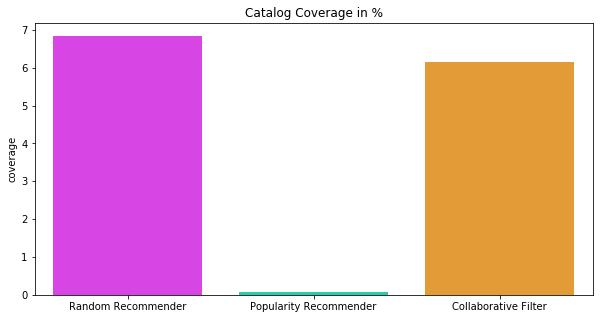

In [94]:
coverage_scores = [random_coverage, pop_coverage, cf_coverage]
model_names = ['Random Recommender', 'Popularity Recommender', 'Collaborative Filter']

fig = plt.figure(figsize=(10, 5))
recmetrics.coverage_plot(coverage_scores, model_names)

In [95]:
recmetrics.personalization(cf_predictions)

0.9959814853776562

In [96]:
recmetrics.personalization(pop_predictions)

2.220446049250313e-16

### Get top - K (K = 5) recommendations. Since our goal is to recommend new products to each user based on his/her habits,we will recommend 5 new products.

In [97]:
predictions_df = pd.DataFrame([[x.uid,x.iid,x.est] for x in predictions])

In [98]:
predictions_df.columns = ["user_id","product_id","est_rating"]
predictions_df.sort_values(by = ["user_id","product_id", "est_rating"],ascending=False,inplace=True)

In [100]:
top_5_recos = predictions_df.groupby("user_id").head(5).reset_index(drop=True)
top_5_recos.head(5)

,user_id,product_id,est_rating
0,A3W4D8XOGLWUN5,B00LKG1MC8,5.0
1,A3W4D8XOGLWUN5,B00LGQ6HL8,5.0
2,A3W4D8XOGLWUN5,B00LA6T0LS,4.0
3,A3W4D8XOGLWUN5,B00L8I6SFY,5.0
4,A3W4D8XOGLWUN5,B00L43HAY6,5.0


### The recall rate of collaberative filtering is more when compared to poularity model. Also coverage of collaberative filetring is better than popularity model. When the recommendation is not user's specific we can go for popularity model.

### Tried hybrid recommendation system but needs to understand more

### hybrid recommendation system

In [ ]:
df3.shape

In [ ]:
R_df = df3.pivot(index = 'user_id', columns ='product_id', values = 'ratings').fillna(0)
R_df.head

In [ ]:
from scipy.sparse.linalg import svds
U, sigma, Vt = svds(R_df, k = 50)

In [ ]:
#diag
sigma = np.diag(sigma)

In [ ]:
#I also need to add the user means back to get the predicted 5-star ratings
all_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt) 
preds_df = pd.DataFrame(all_user_predicted_ratings, columns = R_df.columns)

In [ ]:
preds_df.head()

In [ ]:
sigma

In [ ]:
df3.sort_values(['ratings'], ascending=False)

In [ ]:
# return the movies with the highest predicted rating that the specified user hasn’t already rated
#Take specific user row from matrix from predictions
def recommend_movies(predictions_df, userID, original_ratings_df, num_recommendations=5):
    
    # Get and sort the user's predictions
    sorted_user_predictions = predictions_df.iloc[1].sort_values(ascending=False)
    
    # Get the user's data and merge in the movie information.
    user_data = original_ratings_df[original_ratings_df.user_id == (userID)]
    #Added title and genres
    user_full = (
                     original_ratings_df.sort_values(['ratings'], ascending=False)
                 )

    print ('User {0} has already rated {1} products.'.format(userID, user_full.shape[0]))
    print ('Recommending the highest {0} predicted ratings product not already rated.'.format(num_recommendations))
    
    # Recommend the highest predicted rating movies that the user hasn't seen yet.
    recommendations = (original_ratings_df[~original_ratings_df['product_id'].isin(user_full['product_id'])].
         merge(pd.DataFrame(sorted_user_predictions).reset_index(), how = 'left',
               left_on = 'product_id',
               right_on = 'product_id').
         rename(columns = {1: 'Predictions'}).
         sort_values('Predictions', ascending = False).
                       iloc[:num_recommendations, :-1]
                      )

    return user_full, recommendations, sorted_user_predictions, user_data, user_full

already_rated, predictions, sorted_user_predictions, user_data, user_full = recommend_movies(preds_df, 'A2BYV7S1QP2YIG', df3, 10)

In [ ]:
sorted_user_predictions